In [18]:
import cv2 as cv
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [19]:
image=cv.imread('cic.png')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

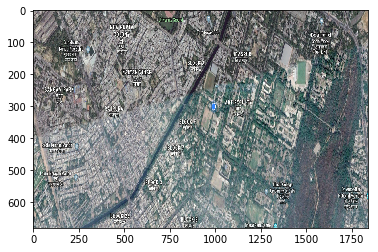

In [20]:
plt.imshow(image,aspect='auto')

In [21]:
image = image.reshape((image.shape[0] * image.shape[1], 3))

In [22]:
clt = KMeans(n_clusters = 3)
clt.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)
 
    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()
 
    # return the histogram
    return hist
def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0
 
    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv.rectangle(bar, (int(startX), 0), (int(endX), 50),
        color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar

In [24]:
hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)

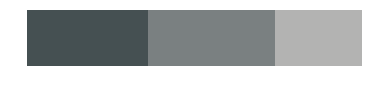

In [25]:
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

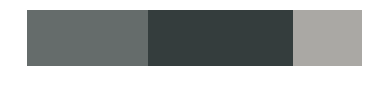

In [26]:
image=cv.imread('earth.JPG')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image = image.reshape((image.shape[0] * image.shape[1], 3))
clt.fit(image)
hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

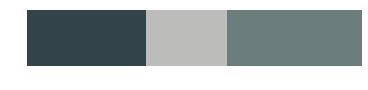

In [27]:
image=cv.imread('toogreen.png')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image = image.reshape((image.shape[0] * image.shape[1], 3))
clt.fit(image)
hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)
cv.imwrite('bar.png',bar)
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()